Note: All of the model fits presented here have been pre-run using the script `choice_models.py`. This can take a lot of time to run.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')

fig_size = (4.5, 2.0)

# Experiment 1

In [2]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_lin.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_lin_rbf_cls.pkl')

# calculate chance
n = len(pd.read_csv('Data/exp_linear/rbfpred.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 132252.482051


,LOO,dLOO,LOO_se
Scrambled,74097.900166,22674.355099,457.744119
Lin-Reg,71422.248629,19998.703562,452.491382
Bayesian-GP,58137.534089,6713.989021,438.439840
GP-RBF,55613.788485,4190.243417,432.336853
Kalman,54122.157548,2698.612481,424.828126
Clustering,54121.496627,2697.951559,424.809565
GP-RBF/Kalman,53652.620514,2229.075447,422.534691
Linear/Clustering,53652.000256,2228.455189,422.527828
GP-RBF/Clustering,51423.545067,0.000000,424.499452


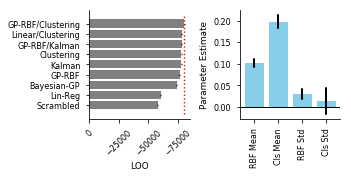

In [3]:
def plot_results(loo, summary, chance_loo):
    fig, axes = plt.subplots(1, 2, figsize=fig_size, gridspec_kw=dict(wspace=0.5))
    ax = axes[0]
    min_loo = np.min(loo.LOO - chance_loo)
    with sns.axes_style('ticks'):
        plt.sca(ax)
        ax.barh(range(len(loo.LOO.values)), 
                 loo.LOO.values - chance_loo, color='grey', align='center')
        ax.set_yticks(range(len(loo.LOO.values)))
        ax.set_yticklabels(loo.index.tolist())
        ax.errorbar(y = range(len(loo.LOO.values)), 
                    x = loo.LOO.values - chance_loo,
                    xerr = loo.LOO_se.values, linestyle='None',
                    color='k',
                   )
        xlb, xub = plt.gca().get_xlim()
        ylb, yub = plt.gca().get_ylim()

        ax.plot([min_loo, min_loo],[ylb, yub], 'r:')
        ax.set_xlim([xub, xlb])
        sns.despine()


        ax.set_xlabel('LOO')
        plt.xticks(rotation=45)

        #### second plot
        ax = axes[1]
        plt.sca(ax)

        vars_  = ['mu_beta_rbf_mean', 'mu_beta_cls_mean', 
                  'mu_beta_rbf_stdv', 'mu_beta_cls_stdv',]
        labels = ['RBF Mean', 'Cls Mean', 'RBF Std', 'Cls Std']

        y = summary.loc[vars_, 'mean'].values
        plt.bar(range(4), y, color='skyblue')

        for ii, b in enumerate(vars_):
            ylb = summary.loc[b, 'hpd_2.5']
            yub = summary.loc[b, 'hpd_97.5']
            ax.plot([ii,ii], [ylb, yub], 'k', linewidth=2)
        plt.xticks(range(len(y)))
        ax.set_xticklabels(labels)

        ax.axhline(y=0, color='k', linewidth=1)

        plt.ylabel('Parameter Estimate')
        plt.xticks(rotation=90)
        ax.xaxis.label.set_visible(False)
        return fig

_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_linear.pdf', dpi=300, bbox_inches='tight')

# Experiment Change Point

In [4]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_cp.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_cp_rbf_cls.pkl')

# calculate chance
n = len(pd.read_csv('Data/exp_changepoint/changerbfpred.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 163444.105176


,LOO,dLOO,LOO_se
Lin-Reg,101423.755973,20099.814291,484.530571
GP-RBF,100584.716005,19260.774323,483.323023
Bayesian-GP,83465.422383,2141.480702,462.760712
Clustering,81776.347222,452.405540,481.782409
Kalman,81774.806889,450.865207,481.775447
GP-RBF/Clustering,81325.406960,1.465278,479.877466
Linear/Clustering,81323.994177,0.052495,479.876519
GP-RBF/Kalman,81323.941682,0.000000,479.878689


In [5]:
# note, GP-RBF/Clustering and Linear clustering are indistinguishable for this model

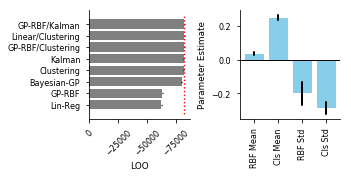

In [6]:
_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_cp.pdf', dpi=300, bbox_inches='tight')

# Experiment Scrambled

In [7]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_scram.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_scram_rbf_cls.pkl')

# calculate chance
n = len(pd.read_csv('Data/exp_scrambled/gprbfscrambled.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 102308.523851


,LOO,dLOO,LOO_se
Scrambled,61617.446734,17759.270790,392.639567
Lin-Reg,59843.580073,15985.404129,389.632792
Bayesian-GP,47438.683217,3580.507273,383.125824
GP-RBF,47144.564512,3286.388568,383.442492
Clustering,45595.940702,1737.764758,378.727403
Kalman,45592.315077,1734.139133,378.716824
GP-RBF/Kalman,45251.443890,1393.267946,377.572884
Linear/Clustering,45248.992712,1390.816768,377.569572
GP-RBF/Clustering,43858.175944,0.000000,377.763555


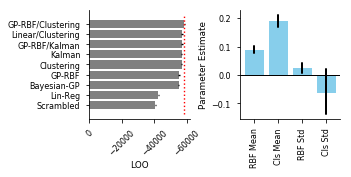

In [8]:
_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_scrambled.pdf', dpi=300, bbox_inches='tight')

# Experiment Shifted

In [9]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_shifted.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_shifted_rbf_cls.pkl')

# calculate chance
n = len(pd.read_csv('Data/exp_shifted/gprbfshifted.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 163444.105176


,LOO,dLOO,LOO_se
Scrambled,120707.485074,27157.010463,429.801318
Lin-Reg,115895.964440,22345.489829,444.243539
Bayesian-GP,109823.165807,16272.691195,457.807441
Kalman,103177.894853,9627.420242,467.922901
Clustering,103176.607294,9626.132682,467.884898
GP-RBF,101133.200966,7582.726355,470.569418
Linear/Clustering,100949.175983,7398.701372,468.220908
GP-RBF/Kalman,100946.782357,7396.307745,468.233124
GP-RBF/Clustering,93550.474611,0.000000,477.185323


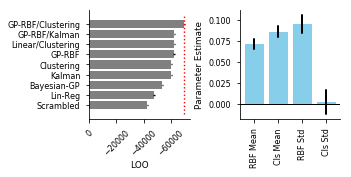

In [10]:
_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_shifted.pdf', dpi=300, bbox_inches='tight')

# Experiment SRS

In [11]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_srs.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_srs_rbf_cls.pkl')

# calculate chance
n = len(pd.read_csv('Data/exp_srs/gprbfsrs.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 140986.136526


,LOO,dLOO,LOO_se
Scrambled,88242.298341,24651.229997,452.617119
Lin-Reg,86065.490931,22474.422586,451.208158
Bayesian-GP,69447.723773,5856.655429,450.577691
GP-RBF,68145.964115,4554.895770,449.706803
Clustering,66262.397727,2671.329383,444.585014
Kalman,66260.191911,2669.123567,444.532243
Linear/Clustering,65932.360612,2341.292268,443.335323
GP-RBF/Kalman,65930.905966,2339.837621,443.375515
GP-RBF/Clustering,63591.068344,0.000000,443.057297


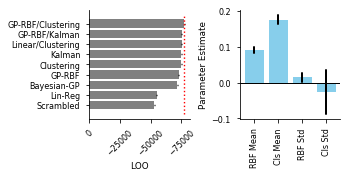

In [12]:
_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_srs.pdf', dpi=300, bbox_inches='tight')